Setup and Install Required Libraries


In [1]:
# Install necessary libraries
!pip install seaborn torch torchvision tensorflow matplotlib opencv-python

# Mount Google Drive to access the dataset (if using Google Drive)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint


Set Dataset Paths

In [30]:
# Set paths for your dataset
positive_img_dir = "/content/drive/MyDrive/sickle-cell-disease-dataset.csv/Positive"
negative_img_dir = "/content/drive/MyDrive/sickle-cell-disease-dataset.csv/Negative"


Load and Preprocess Dataset

In [32]:
# Initialize lists for images and labels
Images = []
Labels = []

# Helper function to load and preprocess images
def load_images_from_directory(directory, label):
    for file_dir, _, files in os.walk(directory):
        for file in files:
            img_file = os.path.join(file_dir, file)
            img = cv2.imread(img_file)
            if img is not None:
                img = cv2.resize(img, (255, 255))  # Resize images to (255, 255)
                Images.append(img)
                Labels.append(label)
            else:
                print(f"Failed to read image: {img_file}")

# Load positive and negative images
load_images_from_directory(positive_img_dir, label=1)  # Positive label = 1
load_images_from_directory(negative_img_dir, label=0)  # Negative label = 0

# Convert to numpy arrays and normalize
Images = np.array(Images) / 255.0
Labels = np.array(Labels)

print(f"Total images: {len(Images)}")
print(f"Total labels: {len(Labels)}")


Total images: 475
Total labels: 475


Visualize Dataset


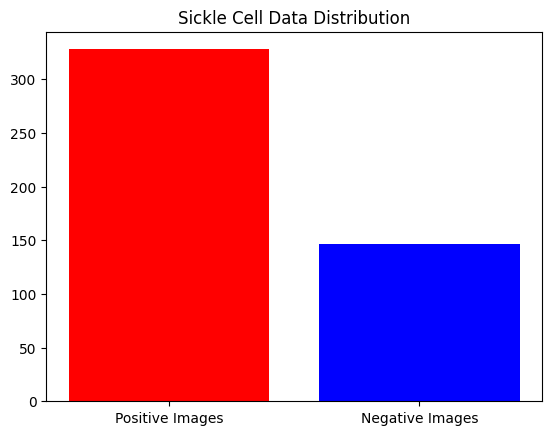

In [33]:
# Visualize the distribution of labels
positive_count = np.sum(Labels)
negative_count = len(Labels) - positive_count

fig, ax = plt.subplots()
ax.bar(['Positive Images', 'Negative Images'], [positive_count, negative_count], color=['red', 'blue'])
ax.set_title('Sickle Cell Data Distribution')
plt.show()


Split Dataset


In [34]:
from sklearn.model_selection import train_test_split

# Check if the dataset contains enough samples for splitting
if len(Images) > 1:
    # Perform the split if there are enough samples
    train_X, test_X, train_y, test_y = train_test_split(
        Images, Labels,
        stratify=Labels if len(set(Labels)) > 1 else None,
        test_size=0.2,
        random_state=42
    )
    print(f"Train set size: {train_X.shape}")
    print(f"Test set size: {test_X.shape}")
else:
    # Handle edge case where the dataset is too small
    print("Not enough samples in the dataset for splitting. Using all data for both training and testing.")
    train_X, test_X, train_y, test_y = Images, Images, Labels, Labels

# Confirm the dataset split
print(f"Train set size: {len(train_X)}, Test set size: {len(test_X)}")


Train set size: (380, 255, 255, 3)
Test set size: (95, 255, 255, 3)
Train set size: 380, Test set size: 95


Logistic Regression Model


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8
Precision: 0.821917808219178
Recall: 0.9090909090909091
F1 Score: 0.8633093525179856


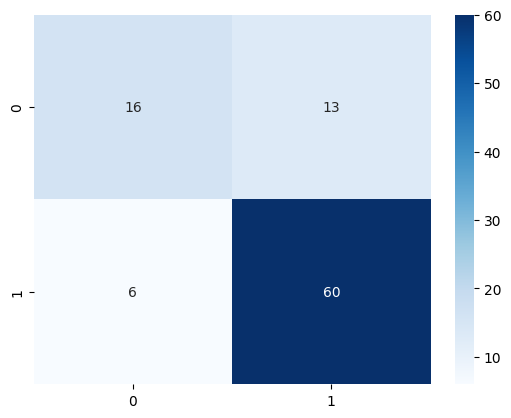

In [35]:
# Flatten images for Logistic Regression
train_X_flattened = train_X.reshape(len(train_X), -1)
test_X_flattened = test_X.reshape(len(test_X), -1)

# Train Logistic Regression
lr = LogisticRegression(random_state=42).fit(train_X_flattened, train_y)

# Evaluate Logistic Regression
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

evaluate_model(lr, test_X_flattened, test_y)


Convolutional Neural Network (CNN)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.5530 - loss: 5.8275 - val_accuracy: 0.3684 - val_loss: 0.7328
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.5015 - loss: 0.6975 - val_accuracy: 0.6947 - val_loss: 0.6279
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.7091 - loss: 0.6365 - val_accuracy: 0.6632 - val_loss: 0.6210
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.7325 - loss: 0.5876 - val_accuracy: 0.6421 - val_loss: 0.6068
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.7095 - loss: 0.5740 - val_accuracy: 0.6737 - val_loss: 0.5759
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.7443 - loss: 0.4983 - val_accuracy: 0.8316 - val_loss: 0.3653
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.8979 - loss: 0.2943 - val_accuracy: 0.7895 - val_loss: 0.3605
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.8990 - loss: 0.2532 - val_accuracy: 0.8842 - val_loss:

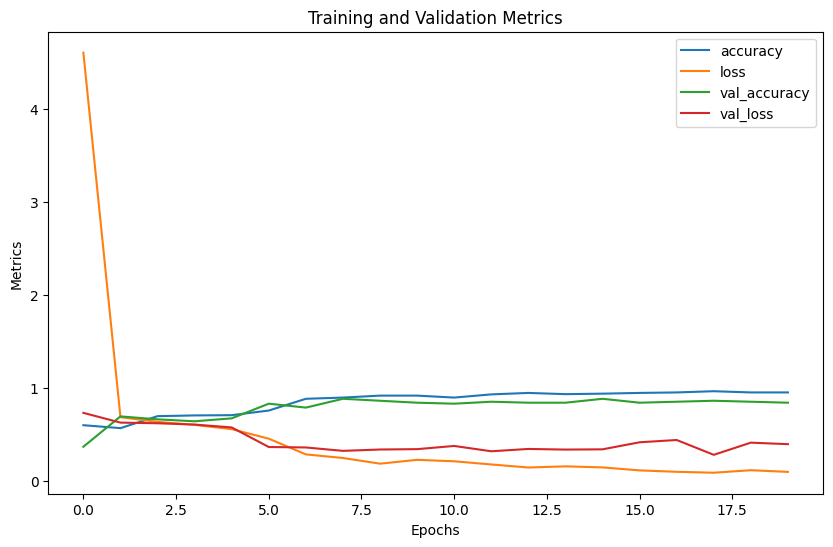

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt

# Define CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# Train CNN Model with corrected ModelCheckpoint
checkpoint = ModelCheckpoint(
    filepath="best_cnn_model.keras",  # Use .keras extension
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

history = cnn_model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y),
    epochs=20,
    callbacks=[checkpoint]
)

# Plot Training History
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.title("Training and Validation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()



Evaluate CNN


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 991ms/step
Evaluation Metrics:
Accuracy: 0.88
Precision: 0.95
Recall: 0.88
F1 Score: 0.91


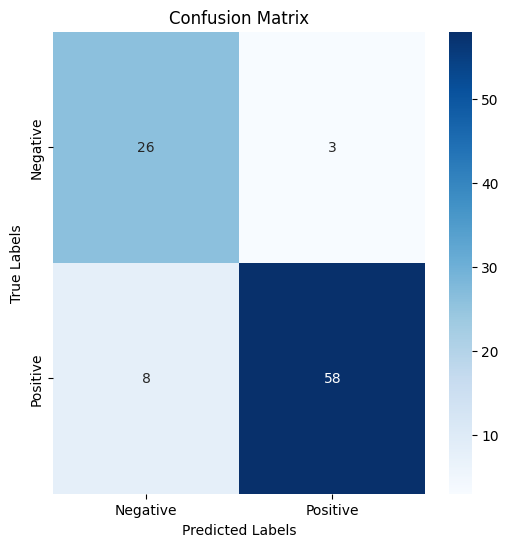

In [40]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the best model (saved as .keras)
best_cnn_model = load_model("best_cnn_model.keras")

# Evaluate on the test dataset
predictions = best_cnn_model.predict(test_X)
predicted_labels = np.round(predictions).flatten()  # Round predictions to get binary labels

# Evaluate performance
accuracy = accuracy_score(test_y, predicted_labels)
precision = precision_score(test_y, predicted_labels)
recall = recall_score(test_y, predicted_labels)
f1 = f1_score(test_y, predicted_labels)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(test_y, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
